# Traffic Citations Modeling Exploration


## Load Data

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
url = 'https://s3-us-west-2.amazonaws.com/pcadsassessment/parking_citations.corrupted.csv'
df = pd.read_csv(url)

/home/peterdraznik/coding_practice/grainger_assessment/1_traffic_citations_modeling_pipeline/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df.dtypes)
df.head()

Ticket number             object
Issue Date                object
Issue time               float64
Meter Id                  object
Marked Time              float64
RP State Plate            object
Plate Expiry Date        float64
VIN                       object
Make                      object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtype: object


Ticket number           Issue Date  Issue time Meter Id  Marked Time  \
0    1103341116  2015-12-21T00:00:00      1251.0      NaN          NaN   
1    1103700150  2015-12-21T00:00:00      1435.0      NaN          NaN   
2    1104803000  2015-12-21T00:00:00      2055.0      NaN          NaN   
3    1104820732  2015-12-26T00:00:00      1515.0      NaN          NaN   
4    1105461453  2015-09-15T00:00:00       115.0      NaN          NaN   

  RP State Plate  Plate Expiry Date  VIN  Make Body Style Color  \
0             CA           200304.0  NaN   NaN         PA    GY   
1             CA           201512.0  NaN   NaN         VN    WH   
2             CA           201503.0  NaN   NaN         PA    BK   
3             CA                NaN  NaN   NaN         PA    WH   
4             CA           200316.0  NaN  CHEV         PA    BK   

             Location  Route  Agency Violation code Violation Description  \
0     13147 WELBY WAY  01521     1.0         4000A1    NO EVIDENCE OF REG   
1       525 S MAIN ST   1C51     1.0         4000A1    NO EVIDENCE OF REG   
2       200 WORLD WAY    2R2     2.0           8939            WHITE CURB   
3       100 WORLD WAY   2F11     2.0            000                17104h   
4  GEORGIA ST/OLYMPIC  1FB70     1.0          8069A  NO STOPPING/STANDING   

   Fine amount   Latitude  Longitude  
0         50.0    99999.0    99999.0  
1         50.0    99999.0    99999.0  
2         58.0  6439997.9  1802686.4  
3          NaN  6440041.1  1802686.2  
4         93.0    99999.0    99999.0

- Ticket number - likely drop v1 
- Issue Date 
    - Split to day of month, day of year, month, and year
- Issue time 
    - Split to hour and minute
- Issue Date 
    - Split to day of month, day of year, month, and year
- Meter Id
    - Really categorical but likely too many values to one-hot
    - Limit to to categories yielding ~90% of citations and other category
- Marked Time
    - How is this different than issued time??
    - Why so few in comparison?
- RP State Plate
    - One hot encode
- VIN
    - Get expected make from vin if possible
    - Split to WIN and manufacturer code
- Body Style
    - Hot Encode
    - Is possible for each popular make
- Color
    - Hot Encode
    - Is possible for each popular make
- Route
    - Drop for v1
- Agency
    - Hot Encode
- Violation Code
    - Limit to to categories yielding ~90% of citations and other category
    - Hot Encode

- Violation Description
    - Drop v1
- Fine amount
    - Impute & Scale
- Lat/Lng
    - Drop v1
    

In [5]:
df.describe()

Issue time    Marked Time  Plate Expiry Date        Agency  \
count  8.723431e+06  290599.000000       7.931187e+06  8.725469e+06   
mean   1.203930e+03    1055.399286       1.867823e+05  5.200932e+01   
std    4.722413e+02     227.596205       5.276278e+04  9.301675e+00   
min    0.000000e+00       1.000000       1.000000e+00  1.000000e+00   
25%    9.120000e+02     910.000000       2.016010e+05  5.100000e+01   
50%    1.156000e+03    1035.000000       2.017020e+05  5.400000e+01   
75%    1.511000e+03    1200.000000       2.018030e+05  5.500000e+01   
max    2.359000e+03    2400.000000       8.201080e+05  9.700000e+01   

        Fine amount      Latitude     Longitude  
count  8.719507e+06  8.726011e+06  8.726011e+06  
mean   7.011293e+01  5.501648e+06  1.586792e+06  
std    3.211512e+01  3.004177e+06  2.065458e+06  
min    1.000000e+01  9.999900e+04  9.999900e+04  
25%    6.300000e+01  6.421512e+06  1.821558e+06  
50%    6.800000e+01  6.451540e+06  1.841987e+06  
75%    7.300000e+01  6.475013e+06  1.858207e+06  
max    5.050000e+02  4.042322e+09  4.042322e+09

In [6]:
df.describe(include=['O'])

Ticket number           Issue Date Meter Id RP State Plate  \
count         8726014              8725478  2269502        8725249   
unique        8726014                 1843    37823             78   
top        4311744511  2016-01-19T00:00:00       37             CA   
freq                1                 9830    46582        8127986   

                VIN     Make Body Style    Color           Location    Route  \
count         16309  4357544    8717124  8721899            8725160  8660660   
unique         7745     1477        191      106            1506075     8479   
top     NOT VISIBLE     TOYT         PA       BK  1301 ELECTRIC AVE    00600   
freq           1894   721411    7673976  1879909               9436   515410   

       Violation code Violation Description  
count         8726014               8725142  
unique            297                   795  
top           80.69BS  NO PARK/STREET CLEAN  
freq          2439494               2530294

In [7]:
df.corr()

Issue time  Marked Time  Plate Expiry Date    Agency  \
Issue time           1.000000     0.794681           0.015416 -0.044719   
Marked Time          0.794681     1.000000           0.104978 -0.051138   
Plate Expiry Date    0.015416     0.104978           1.000000 -0.069759   
Agency              -0.044719    -0.051138          -0.069759  1.000000   
Fine amount         -0.008451     0.010113          -0.027810 -0.036791   
Latitude             0.038227    -0.031357          -0.011315  0.150469   
Longitude            0.016143    -0.033775          -0.004169  0.060261   

                   Fine amount  Latitude  Longitude  
Issue time           -0.008451  0.038227   0.016143  
Marked Time           0.010113 -0.031357  -0.033775  
Plate Expiry Date    -0.027810 -0.011315  -0.004169  
Agency               -0.036791  0.150469   0.060261  
Fine amount           1.000000 -0.002861  -0.001199  
Latitude             -0.002861  1.000000   0.852471  
Longitude            -0.001199  0.852471   1.000000

## Look Into Makes 

In [8]:
print(list(df['Make'].unique()))


num_counts_per_make = df['Make'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(num_counts_per_make)

[nan, 'CHEV', 'MAZD', 'FORD', 'CHRY', 'TOYO', 'HOND', 'NISS', 'TESL', 'MBNZ', 'ACUR', 'SUBA', 'SCIO', 'CADI', 'KIA', 'FREI', 'KW', 'HINO', 'LROV', 'VOLK', 'OLDS', 'BMW', 'BUIC', 'HYUN', 'LEXU', 'DODG', 'GMC', 'AUDI', 'JEEP', 'INFI', 'SATU', 'SUZU', 'PONT', 'MITS', 'MERC', 'JAGR', 'BENZ', 'MERZ', 'TOYT', 'SAA', 'LINC', 'LEXS', 'MNNI', 'FRHT', 'PTRB', 'UNK', 'ISU', 'PORS', 'FIAT', 'STRN', 'VOLV', 'PLYM', 'OTHR', 'MASE', 'INTL', 'MACK', 'JENS', 'KAWK', 'GEO', 'BENT', 'ROL', 'HD', 'RROV', 'HNO', 'YAMA', 'JAGU', 'GRUM', 'LNDR', 'HUMM', 'DATS', 'TSMR', 'DAEW', 'SUZI', 'ACC', 'MINI', 'ISUZ', 'SMRT', 'ASTO', 'FERR', 'CHEC', 'IND', 'SABU', 'SAAB', 'LOOK', 'INTE', 'APR', 'RANG', 'HARL', 'KAWA', 'DUES', 'TRIU', 'STLG', 'LAMO', 'CIMC', 'LODC', 'MERK', 'AUBU', 'CNQS', 'MH', 'AURO', 'LIEB', 'WHIT', 'UTIL', 'MUST', 'LAND', 'SWMD', 'LRVR', 'NEOP', 'WINN', 'STU', 'WABA', 'MITZ', 'SMAR', 'GILL', 'THT', 'FRTL', 'BUGA', 'VANS', 'VW', 'SUV', 'SUB', 'EGLE', 'ALFA', 'LASE', 'TRAV', 'COMP', 'GRAN', 'FIEL', 'S

Q: Are MERZ and BENZ both Mercades-Benz?
Q: If so should they be grouped together? More generally are there any other models that should be grouped? 
Q: Does OTHER count as a popular make?


### Get Popular Makes

In [9]:
col_target = 'is_popular_make'

In [10]:
num_popular_makes = 25
num_citations_per_make = df[(df['Make'] != 'OTHR') & (~df['Make'].isnull()) & (~df['Make'].isna()) ]['Make'].value_counts()
popular_makes = num_citations_per_make[:num_popular_makes].keys().tolist()
df[col_target] = df['Make'].isin(popular_makes)
num_citations_per_make[:num_popular_makes]

TOYT    721411
HOND    491961
FORD    382695
NISS    311324
CHEV    297076
BMW     199221
MERZ    177307
VOLK    149501
HYUN    133864
DODG    127764
LEXS    124508
KIA     101746
JEEP    100909
AUDI     84229
MAZD     79853
GMC      62391
CHRY     57317
INFI     56809
ACUR     52703
SUBA     46898
VOLV     42330
TOYO     40064
MITS     37842
CADI     34080
MNNI     30885
Name: Make, dtype: int64

## Look Into Colors 

In [11]:
df['Color']

0          GY
1          WH
2          BK
3          WH
4          BK
           ..
8726009    WT
8726010    SL
8726011    GY
8726012    GY
8726013    BK
Name: Color, Length: 8726014, dtype: object

In [12]:
print("\n".join(list(map(str, df['Color'].unique()))))

df['Color'].value_counts()

GY
WH
BK
BL
BR
SI
GO
nan
RE
MA
TA
BU
GR
YE
OR
WT
RD
SL
BN
OT
GN
MR
BG
PR
TN
UN
PK
TU
CO
BE
RU
PU
PL
CR
SN
PE
BZ
PI
ME
CH
TE
LI
MU
KH
GA
AQ
WI
OL
SA
KA
RS
CL
TP
PW
SU
CP
UT
SH
OG
UK
VI
BW
RV
YL
TW
GD
DA
W
BC
TL
MY
EF
WE
AU
WR
WA
AM
GL
RA
BI
BA
ES
LA
PP
GE
VA
LE
CA
SV
BH
AP
VO
VU
SM
TR
O
R
IN
MN
IV
MP
AD
MD
SO
CU
MC
MI


BK    1879909
WT    1809932
GY    1691850
SL    1092754
BL     678777
       ...   
SO          1
MC          1
WA          1
CU          1
AP          1
Name: Color, Length: 106, dtype: int64

In [13]:
num_citations_per_color = df['Color'].value_counts()

In [14]:
df_num_citations_per_color_per_is_popular_makes = df[~df['Make'].isnull()].groupby([col_target, 'Color']).apply(len).unstack().T.fillna(0)
num_records_per_color = df_num_citations_per_color_per_is_popular_makes.sum(axis=1)

df_num_citations_per_color_per_is_popular_makes['pct_True'] = df_num_citations_per_color_per_is_popular_makes[True]  / num_records_per_color
df_num_citations_per_color_per_is_popular_makes

is_popular_make     False      True  pct_True
Color                                        
AQ                    0.0       6.0  1.000000
BA                    1.0       1.0  0.500000
BE                  247.0     521.0  0.678385
BG                 4574.0   22894.0  0.833479
BH                    0.0       1.0  1.000000
...                   ...       ...       ...
WI                    2.0       1.0  0.333333
WR                    0.0       1.0  1.000000
WT               100525.0  803742.0  0.888833
YE                 3421.0   14256.0  0.806472
YL                    4.0      13.0  0.764706

[80 rows x 3 columns]

In [15]:
num_top_colors = 15
top_colors = num_citations_per_color[:num_top_colors].keys().tolist()
#df['Color'].apply(lambda val: val if val in top_colors+[None] else 'OTHR')

### Are there colors which are only made by certain (popular) manufacturers?

In [16]:
df_num_citations_per_color_per_is_popular_makes.sort_values(by=['pct_True', True], ascending=[False, False])

is_popular_make  False  True  pct_True
Color                                 
AQ                 0.0   6.0       1.0
SA                 0.0   6.0       1.0
OL                 0.0   4.0       1.0
MN                 0.0   2.0       1.0
SN                 0.0   2.0       1.0
...                ...   ...       ...
MI                 1.0   0.0       0.0
PP                 1.0   0.0       0.0
RV                 3.0   0.0       0.0
TL                 1.0   0.0       0.0
VU                 1.0   0.0       0.0

[80 rows x 3 columns]

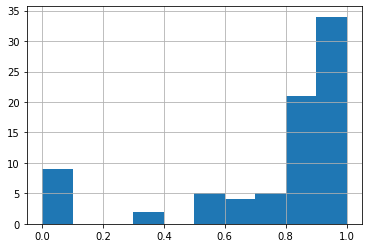

In [17]:
df_num_citations_per_color_per_is_popular_makes['pct_True'].hist()


In [18]:
possible_colors_per_popular_make = df[df[col_target]].groupby('Make')['Color'].unique()
all_possible_colors_from_popular_makes = df[df[col_target]]['Color'].unique()
df['color_short'] = df['Color'].apply(lambda val: val if val in top_colors+[None] else 'OTHR')
per_popular_make = df[df[col_target]].groupby('Make')['Color'].unique()
for make, all_possible_colors_for_make in possible_colors_per_popular_make.items():
    df[f'is_possible_color_from_{make}'] = df['Color'].isin(all_possible_colors_for_make)
df['is_possible_color_from_popular_make'] = df['Color'].isin(all_possible_colors_from_popular_makes)

In [19]:
df_color_popularity_matrix = df.groupby([col_target, 'is_possible_color_from_popular_make']).apply(len).unstack()

In [20]:
df_color_popularity_matrix.unstack()

is_possible_color_from_popular_make  is_popular_make
False                                False                   49.0
                                     True                     NaN
True                                 False              4781277.0
                                     True               3944688.0
dtype: float64

 
## Look into Fine Amount

In [21]:
df['is_popular_make_str'] = df[~df['Make'].isnull()][col_target].astype(str)

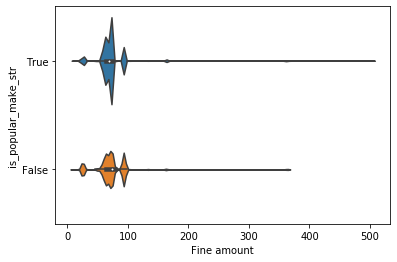

In [22]:
import seaborn as sns

sns.violinplot(x='Fine amount', data=df, y='is_popular_make_str')

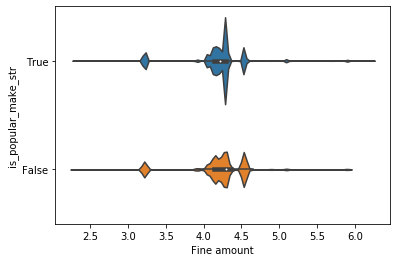

In [45]:
import numpy as np
sns.violinplot(x=np.log(df['Fine amount']), y=df['is_popular_make_str'])

Make
ACUR    AxesSubplot(0.125,0.125;0.775x0.755)
AUDI    AxesSubplot(0.125,0.125;0.775x0.755)
BMW     AxesSubplot(0.125,0.125;0.775x0.755)
CADI    AxesSubplot(0.125,0.125;0.775x0.755)
CHEV    AxesSubplot(0.125,0.125;0.775x0.755)
CHRY    AxesSubplot(0.125,0.125;0.775x0.755)
DODG    AxesSubplot(0.125,0.125;0.775x0.755)
FORD    AxesSubplot(0.125,0.125;0.775x0.755)
GMC     AxesSubplot(0.125,0.125;0.775x0.755)
HOND    AxesSubplot(0.125,0.125;0.775x0.755)
HYUN    AxesSubplot(0.125,0.125;0.775x0.755)
INFI    AxesSubplot(0.125,0.125;0.775x0.755)
JEEP    AxesSubplot(0.125,0.125;0.775x0.755)
KIA     AxesSubplot(0.125,0.125;0.775x0.755)
LEXS    AxesSubplot(0.125,0.125;0.775x0.755)
MAZD    AxesSubplot(0.125,0.125;0.775x0.755)
MERZ    AxesSubplot(0.125,0.125;0.775x0.755)
MITS    AxesSubplot(0.125,0.125;0.775x0.755)
MNNI    AxesSubplot(0.125,0.125;0.775x0.755)
NISS    AxesSubplot(0.125,0.125;0.775x0.755)
SUBA    AxesSubplot(0.125,0.125;0.775x0.755)
TOYO    AxesSubplot(0.125,0.125;0.775x0.755)
TOYT 

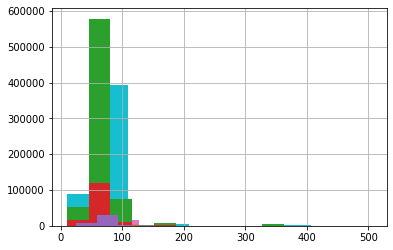

In [23]:
df[df[col_target] == True].groupby('Make')['Fine amount'].hist()

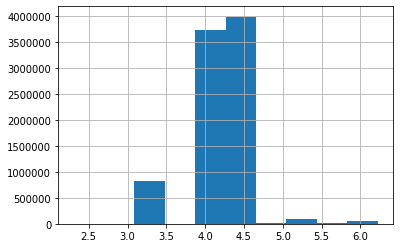

In [24]:
np.log(df['Fine amount']).hist()


## Look into Body Style

In [25]:
df['Body Style'].value_counts()

PA    7673976
PU     298897
VN     233505
TK     213271
CM     140263
       ...   
Q5          1
VL          1
US          1
NH          1
FB          1
Name: Body Style, Length: 191, dtype: int64

In [26]:
df_num_citations_per_body_style_per_make = df[~df['Make'].isnull()].groupby(['Body Style', 'Make']).apply(len).sort_values(ascending=False).unstack()
df_num_citations_per_body_style_per_make

Make        TOYT  HOND  NISS  FORD  CHEV  BMW  MERZ  VOLK  HYUN  LEXS  ...  \
Body Style                                                             ...   
'U           1.0   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   
05           NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   
08           NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   
1            NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   
16           NaN   1.0   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   
...          ...   ...   ...   ...   ...  ...   ...   ...   ...   ...  ...   
YU           NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   
Z            NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   
ZV           NaN   NaN   NaN   5.0   NaN  NaN   NaN   NaN   NaN   NaN  ...   
ZX           NaN   NaN   NaN   2.0   NaN  NaN   NaN   NaN   NaN   NaN  ...   
|            NaN   NaN   1.0   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   

Make        DALN  DELT  DIAD  DRLN  DRME  DTAM  DUTC  EAST  ENCO  FBAZ  
Body Style                                                              
'U           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
05           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
08           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
16           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
YU           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Z            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
ZV           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
ZX           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
|            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[145 rows x 1411 columns]

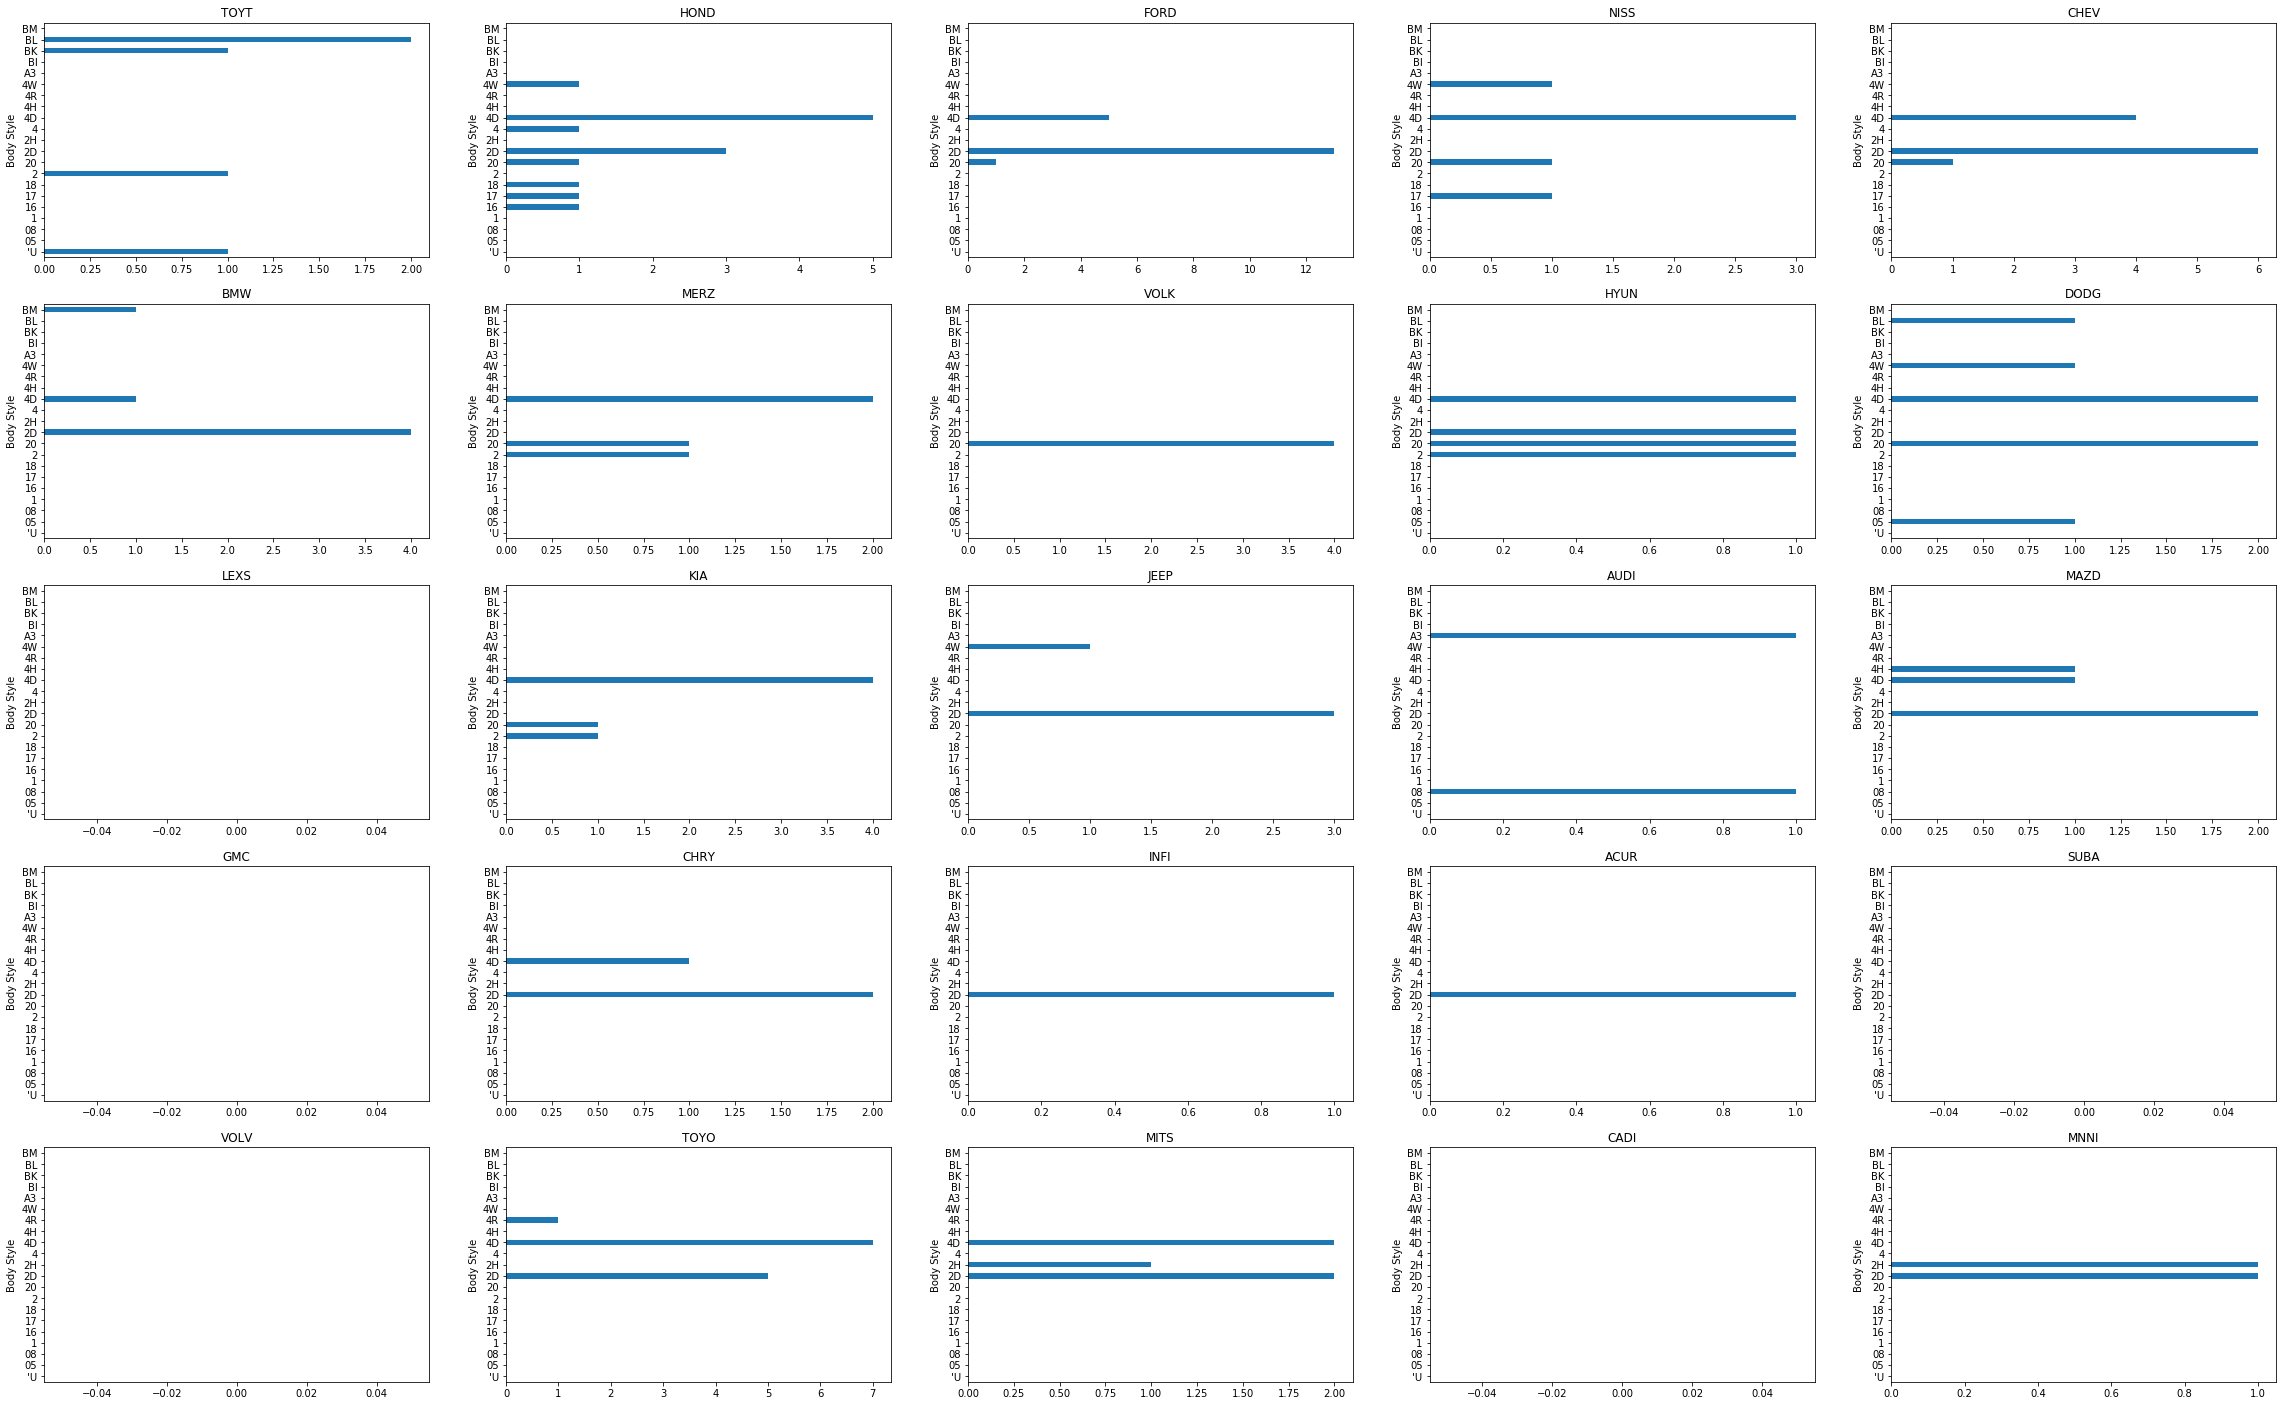

In [27]:
import matplotlib.pyplot as plt
nrows = 5
ncols = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8*ncols, 5*nrows) )

for make_i, make in enumerate(popular_makes):
    row = make_i // ncols
    col = make_i % ncols
    ax = ax = axs[row][col]
    ax.set_title(make)
    df_num_citations_per_body_style_per_make[make].head(21).plot(kind='barh', ax=ax)

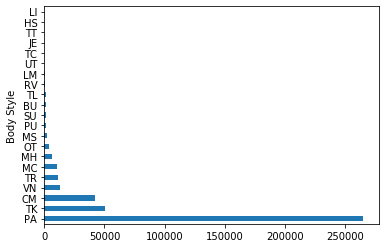

In [28]:
df[(~df['Make'].isin(popular_makes) )& (~df['Make'].isnull()) ].groupby('Body Style').apply(len).sort_values(ascending=False).head(21).plot(kind='barh')

## Look into Meter Id

In [29]:
df['Meter Id'].nunique()

37823

In [30]:
num_citations_per_popular_make_per_meter = df.groupby([col_target, 'Meter Id']).apply(len).unstack().T.fillna(0)
num_citations_per_popular_make_per_meter['pct_True'] = num_citations_per_popular_make_per_meter[True] / num_citations_per_popular_make_per_meter.sum(axis=1)
num_citations_per_popular_make_per_meter.sort_values(by='pct_True', ascending=False)

is_popular_make  False  True  pct_True
Meter Id                              
|                  0.0   1.0       1.0
SV679              0.0   2.0       1.0
SV701              0.0   3.0       1.0
SV801A             0.0   2.0       1.0
SV805              0.0   5.0       1.0
...                ...   ...       ...
VM21               2.0   0.0       0.0
VM216              1.0   0.0       0.0
AE603              3.0   0.0       0.0
VM241              1.0   0.0       0.0
!!                 1.0   0.0       0.0

[37823 rows x 3 columns]

## Look into Agency

In [50]:
df['Agency'].value_counts()

54.0    2150548
51.0    1943578
56.0    1846731
53.0    1571032
55.0     876274
1.0      189383
2.0       51700
57.0      37202
4.0       26652
58.0       9596
36.0       8028
40.0       5644
3.0        4965
11.0       3285
34.0        381
41.0        171
97.0         87
5.0          61
50.0         30
59.0         30
6.0          19
12.0         13
60.0         11
77.0          7
52.0          6
9.0           5
7.0           4
15.0          4
24.0          3
35.0          3
45.0          2
8.0           2
16.0          1
30.0          1
13.0          1
42.0          1
32.0          1
10.0          1
43.0          1
71.0          1
70.0          1
68.0          1
61.0          1
38.0          1
Name: Agency, dtype: int64

Not sure what agency numbers stand for, but I'm assuming it's actually categorical and should be 1-hot

## Look into RP State Plate

In [31]:
df['RP State Plate'].nunique()

78

In [32]:
num_citations_per_popular_make_per_state_plate = df[~df['Make'].isnull()].groupby([col_target, 'RP State Plate']).apply(len).unstack().T.fillna(0)
num_citations_per_popular_make_per_state_plate['pct_True'] = num_citations_per_popular_make_per_state_plate[True] / num_citations_per_popular_make_per_state_plate.sum(axis=1)
num_citations_per_popular_make_per_state_plate.sort_values(by='pct_True', ascending=False)

is_popular_make   False    True  pct_True
RP State Plate                           
|                   0.0     1.0  1.000000
ML                  0.0     1.0  1.000000
NF                  0.0     7.0  1.000000
TT                  0.0    11.0  1.000000
RI                 30.0   630.0  0.954545
...                 ...     ...       ...
YU                  1.0     2.0  0.666667
IN               2203.0  3413.0  0.607728
ME                428.0   559.0  0.566363
GU                  6.0     6.0  0.500000
US                128.0    61.0  0.322751

[77 rows x 3 columns]

In [33]:
num_citations_per_popular_make_per_state_plate[False].sum()


412808.0

what are these I, YU, XX RP State plates?? Don't even seem to fit into Province codes 

## Look into Route

In [34]:
df['Route'].value_counts()

00600    515410
00500    363630
00402    174775
00401    170018
00403    131820
          ...  
5E11          1
RD131         1
3C88          1
6R1           1
11935         1
Name: Route, Length: 8479, dtype: int64

- Need data doc to be able to decode what these routes mean..


## Look into Violation Code

In [35]:
df['Violation code'].nunique()

297

In [36]:
num_citations_per_popular_make_per_code = df[~df['Make'].isnull()].groupby([col_target, 'Violation code']).apply(len).unstack().T.fillna(0)
num_citations_per_popular_make_per_code['pct_True'] = num_citations_per_popular_make_per_code[True] / num_citations_per_popular_make_per_code.sum(axis=1)
num_citations_per_popular_make_per_code.sort_values(by='pct_True', ascending=False)

is_popular_make  False  True  pct_True
Violation code                        
21113C             0.0   1.0       1.0
1564250            0.0   1.0       1.0
8074               0.0   3.0       1.0
8073B2F            0.0   1.0       1.0
8073B2A3           0.0   1.0       1.0
...                ...   ...       ...
8709H              7.0   0.0       0.0
80691C*            4.0   0.0       0.0
80691C**           6.0   0.0       0.0
8073C              1.0   0.0       0.0
80691D             3.0   0.0       0.0

[282 rows x 3 columns]

Todos:
    - Can violation codes be grouped to higher level types?
        ex. 4000A1 -> A1 and 4000 creating A1 group?

## Look into Violation Description

In [37]:
df['Violation Description'].value_counts().head(21)

NO PARK/STREET CLEAN      2530294
METER EXP.                1524589
RED ZONE                   646198
PREFERENTIAL PARKING       599200
DISPLAY OF TABS            535798
NO PARKING                 390111
DISPLAY OF PLATES          239502
WHITE ZONE                 194981
NO STOP/STANDING           157259
PARKED OVER TIME LIMIT     154205
PARKED OVER TIME LIM       136763
STANDNG IN ALLEY           122059
BLOCKING DRIVEWAY          108708
STOP/STAND PROHIBIT         96424
YELLOW ZONE                 92035
NO STOP/STAND               89075
NO EVIDENCE OF REG          86887
PARKED ON SIDEWALK          79419
18 IN. CURB/2 WAY           76348
EXCEED 72HRS-ST             74313
FIRE HYDRANT                68157
Name: Violation Description, dtype: int64

In [38]:
df.groupby(['Violation Description', 'Violation code']).apply(len).sort_values(ascending=False).head(21)


Violation Description   Violation code
NO PARK/STREET CLEAN    80.69BS           2439494
METER EXP.              88.13B+           1524589
RED ZONE                80.56E4+           606361
PREFERENTIAL PARKING    80.58L             599200
DISPLAY OF TABS         5204A-             535798
NO PARKING              80.69B             370800
DISPLAY OF PLATES       5200               239502
WHITE ZONE              80.56E1            188972
NO STOP/STANDING        80.69AP+           157259
PARKED OVER TIME LIMIT  80.69C             154205
PARKED OVER TIME LIM    80.69C             136763
STANDNG IN ALLEY        80.61              122059
BLOCKING DRIVEWAY       22500E             108706
STOP/STAND PROHIBIT     80.69A+             96424
NO PARK/STREET CLEAN    8069BS              90800
YELLOW ZONE             80.56E2             90164
NO STOP/STAND           80.69AA+            89075
NO EVIDENCE OF REG      4000A1              86887
PARKED ON SIDEWALK      22500F              79413
18 IN. CURB

Just drop the description..

## Split the data
... on the uncorrupted 1/2 of the data.

In [39]:
num_records = df.shape[0]

In [40]:
df_no_make = df[df['Make'].isna()]
num_records_no_make = df_no_make.shape[0]
print(num_records_no_make, num_records_no_make/num_records)

4368470 0.5006260590459745


In [41]:
df_with_make = df[~df['Make'].isna()]
num_records_with_make = df_with_make.shape[0]
print(num_records_with_make, num_records_with_make/num_records)

4357544 0.49937394095402554


In [48]:
df_with_make_corr = df_with_make.corr()
df_with_make_corr

Issue time  Marked Time  \
Issue time                             1.000000     0.796187   
Marked Time                            0.796187     1.000000   
Plate Expiry Date                      0.015258     0.104674   
Agency                                -0.044840    -0.049865   
Fine amount                           -0.007937     0.013390   
Latitude                               0.037449    -0.033271   
Longitude                              0.015635    -0.035778   
is_popular_make                       -0.003026     0.029735   
is_possible_color_from_ACUR            0.000112          NaN   
is_possible_color_from_AUDI            0.000965          NaN   
is_possible_color_from_BMW            -0.000322          NaN   
is_possible_color_from_CADI            0.000598          NaN   
is_possible_color_from_CHEV           -0.000450          NaN   
is_possible_color_from_CHRY           -0.000924          NaN   
is_possible_color_from_DODG            0.000639          NaN   
is_possible_color_from_FORD           -0.000442          NaN   
is_possible_color_from_GMC             0.001165          NaN   
is_possible_color_from_HOND           -0.000798          NaN   
is_possible_color_from_HYUN           -0.000713          NaN   
is_possible_color_from_INFI            0.000415          NaN   
is_possible_color_from_JEEP            0.001348          NaN   
is_possible_color_from_KIA            -0.000967          NaN   
is_possible_color_from_LEXS            0.001035          NaN   
is_possible_color_from_MAZD            0.000152          NaN   
is_possible_color_from_MERZ            0.001414          NaN   
is_possible_color_from_MITS            0.001308          NaN   
is_possible_color_from_MNNI            0.005774          NaN   
is_possible_color_from_NISS           -0.000630          NaN   
is_possible_color_from_SUBA           -0.000904          NaN   
is_possible_color_from_TOYO           -0.002454    -0.004806   
is_possible_color_from_TOYT            0.005593          NaN   
is_possible_color_from_VOLK            0.001496          NaN   
is_possible_color_from_VOLV            0.001431     0.001259   
is_possible_color_from_popular_make   -0.000558          NaN   

                                     Plate Expiry Date    Agency  Fine amount  \
Issue time                                    0.015258 -0.044840    -0.007937   
Marked Time                                   0.104674 -0.049865     0.013390   
Plate Expiry Date                             1.000000 -0.069531    -0.027864   
Agency                                       -0.069531  1.000000    -0.035432   
Fine amount                                  -0.027864 -0.035432     1.000000   
Latitude                                     -0.010927  0.148542    -0.002571   
Longitude                                    -0.003974  0.058981    -0.001090   
is_popular_make                               0.148762  0.020798    -0.023883   
is_possible_color_from_ACUR                  -0.002274  0.027404     0.001159   
is_possible_color_from_AUDI                  -0.003573  0.031918     0.000464   
is_possible_color_from_BMW                   -0.002395  0.020473    -0.000154   
is_possible_color_from_CADI                  -0.001737  0.015065     0.000665   
is_possible_color_from_CHEV                  -0.001441  0.021483    -0.000314   
is_possible_color_from_CHRY                  -0.001935  0.026324     0.001014   
is_possible_color_from_DODG                  -0.002161  0.018221     0.000282   
is_possible_color_from_FORD                  -0.001077  0.015662    -0.000282   
is_possible_color_from_GMC                   -0.002688  0.023984     0.000148   
is_possible_color_from_HOND                  -0.001700  0.023911     0.001162   
is_possible_color_from_HYUN                  -0.001865  0.026401     0.001009   
is_possible_color_from_INFI                  -0.002088  0.023101     0.000042   
is_possible_color_from_JEEP                  -0.002138  0.021490    -0.000044   
is_possible_co

In [49]:
df_with_make_corr[col_target]

Issue time                            -0.003026
Marked Time                            0.029735
Plate Expiry Date                      0.148762
Agency                                 0.020798
Fine amount                           -0.023883
Latitude                               0.007592
Longitude                              0.003739
is_popular_make                        1.000000
is_possible_color_from_ACUR            0.003082
is_possible_color_from_AUDI            0.006132
is_possible_color_from_BMW             0.007643
is_possible_color_from_CADI            0.003659
is_possible_color_from_CHEV            0.002069
is_possible_color_from_CHRY            0.003167
is_possible_color_from_DODG            0.002574
is_possible_color_from_FORD            0.003214
is_possible_color_from_GMC             0.002723
is_possible_color_from_HOND            0.003457
is_possible_color_from_HYUN            0.003063
is_possible_color_from_INFI            0.002902
is_possible_color_from_JEEP            0

## Look into Plate Expiry Date   

In [9]:
col = 'Plate Expiry Date'
pd.to_datetime(df[col])

0         1970-01-01 00:00:00.000200304
1         1970-01-01 00:00:00.000201512
2         1970-01-01 00:00:00.000201503
3                                   NaT
4         1970-01-01 00:00:00.000200316
                       ...             
8726009   1970-01-01 00:00:00.000201905
8726010   1970-01-01 00:00:00.000201905
8726011   1970-01-01 00:00:00.000201912
8726012   1970-01-01 00:00:00.000201903
8726013   1970-01-01 00:00:00.000201905
Name: Plate Expiry Date, Length: 8726014, dtype: datetime64[ns]

In [12]:
df[['Plate Expiry Date', 'Issue Date']].head(25)

Plate Expiry Date           Issue Date
0            200304.0  2015-12-21T00:00:00
1            201512.0  2015-12-21T00:00:00
2            201503.0  2015-12-21T00:00:00
3                 NaN  2015-12-26T00:00:00
4            200316.0  2015-09-15T00:00:00
5            201507.0  2015-09-15T00:00:00
6            201605.0  2015-12-17T00:00:00
7            201602.0  2015-12-17T00:00:00
8            201605.0  2015-12-22T00:00:00
9            201701.0  2015-12-22T00:00:00
10           201511.0  2015-12-22T00:00:00
11           201701.0  2015-12-22T00:00:00
12           201511.0  2015-12-22T00:00:00
13           201607.0  2015-12-15T00:00:00
14           201605.0  2015-12-27T00:00:00
15           201602.0  2015-12-27T00:00:00
16           201611.0  2015-12-27T00:00:00
17           201502.0  2015-09-16T00:00:00
18                NaN  2015-09-16T00:00:00
19           201606.0  2015-12-22T00:00:00
20           201611.0  2015-12-22T00:00:00
21           201509.0  2015-12-18T00:00:00
22           201511.0  2015-12-18T00:00:00
23           201511.0  2015-12-18T00:00:00
24           201603.0  2015-12-22T00:00:00

In [16]:
df['plate_expiry_year'] = df['Plate Expiry Date'].astype(str).str.slice(stop=4)
df['plate_expiry_year'].head()

0    2003
1    2015
2    2015
3     nan
4    2003
Name: plate_expiry_year, dtype: object

In [17]:
df['plate_expiry_month'] = df['Plate Expiry Date'].astype(str).str.slice(start=4, stop=6)
df['plate_expiry_month'].head()

0    04
1    12
2    03
3      
4    16
Name: plate_expiry_month, dtype: object

In [18]:
#df['plate_expiry_month_int'] = df['plate_expiry_month'].dropna().astype(int)

ValueError: invalid literal for int() with base 10: ''

In [ ]:
def get_column_as_popular_value_or_other(df, col, col_new, popular_categories_threshold=0.95, verbose=True):
    num_citations_per_category = df[col].value_counts()
    num_top_categories = popular_categories_threshold if popular_categories_threshold >= 1 else None
    if num_top_categories is None:
        s_top_category_cumsum = pd.Series(num_citations_per_category.values).cumsum() / len(df['Color'])
        # NOTE: Keys are the indices of position of categories in value count rankings
        num_top_categories = s_top_category_cumsum[s_top_category_cumsum < popular_categories_threshold][-1].name + 1
        if verbose:
            print(s_top_category_cumsum[s_top_category_cumsum < popular_categories_threshold])
            s_top_category_cumsum.plot()
    #...